Задача 1


In [53]:
%matplotlib inline

from scipy.stats import uniform
import matplotlib.pyplot as plt

def generate(theta, N):
    return uniform.rvs(scale=theta, size=N)

def estimate(samples, theta, estimator):
    result = []
    mean = minimum = maximum = samples[0]
    for i, sample in enumerate(samples):
        mean = (i * mean + sample) / (i + 1)
        minimum = min(minimum, sample)
        maximum = max(maximum, sample)
        error = abs(theta - estimator(mean, i + 1, minimum, maximum))
        result.append(error)
    return result

def draw(N, theta, margin):
    samples = generate(theta, N)
    
    plt.figure(figsize=(15,10))
    plt.axis([0, N, 0, margin * theta])

    plt.plot(range(N),
        estimate(samples, theta, lambda mean, l, min, max: 2 * mean),
        label='2 * E')
    plt.plot(range(N),
        estimate(samples, theta, lambda mean, l, min, max: mean + max / 2),
        label='E + X_(n) / 2')
    plt.plot(range(N),
        estimate(samples, theta, lambda mean, l, min, max: (l + 1) * min),
        label='(l + 1) * X_(1)')
    plt.plot(range(N),
        estimate(samples, theta, lambda mean, l, min, max: min + max),
        label='X_(1) + X_(n)')
    plt.plot(range(N),
        estimate(samples, theta, lambda mean, l, min, max: float(l + 1) / l * max),
        label='(l + 1) / l * X_(n)')
    plt.legend()
    plt.show()


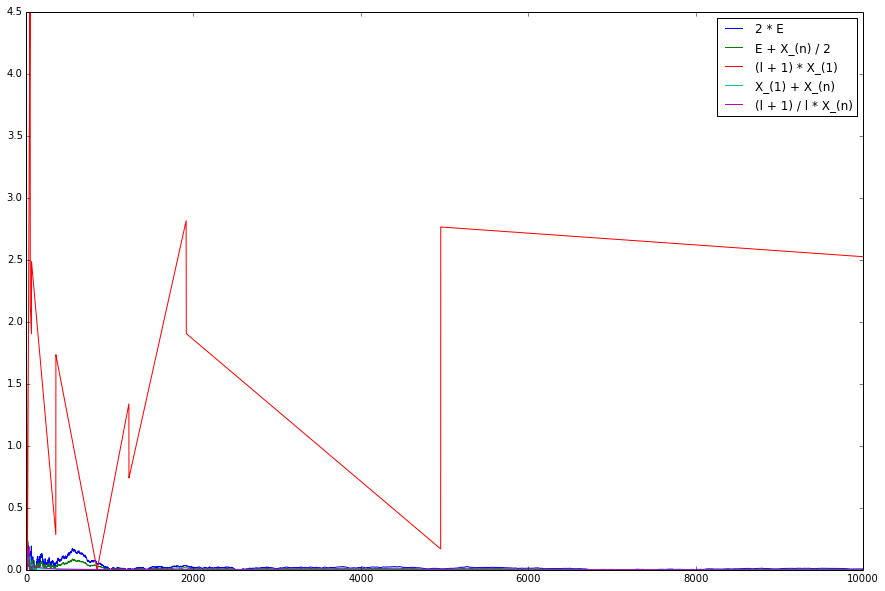

In [56]:
draw(10 ** 4, 3, 1.5)

Из графика видно, что оценка (l + 1) * X_(1) хуже остальных, поэтому поменяем масштаб.

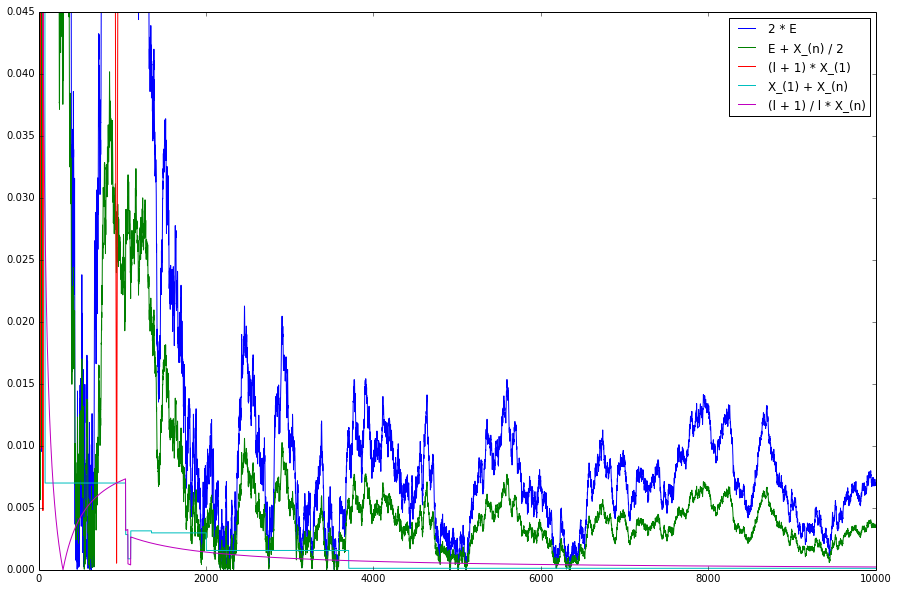

In [43]:
draw(10 ** 4, 3, 0.015)

Заметим, что 2 * E ведет себя чуть хуже, чем E + X_(n) / 2, однако наилучшие оценки -- те, которые основываются на X_(n). Еще раз изменим масштаб.

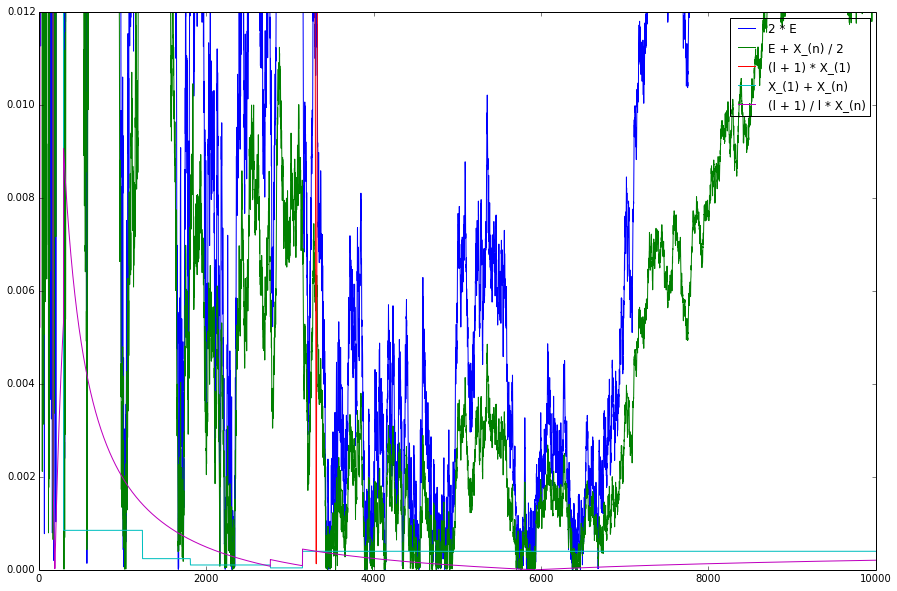

In [48]:
draw(10 ** 4, 3, 0.004)

Запуская несколько раз функцию draw можно заметить, что оценки X_(1) + X_(n) и (l + 1) / l * X_(n) попеременно обыгрывают друг друга, но все время показывают себя лучше всех остальных.

Убедимся, что параметр \theta не влияет на поведение полученных кривых.

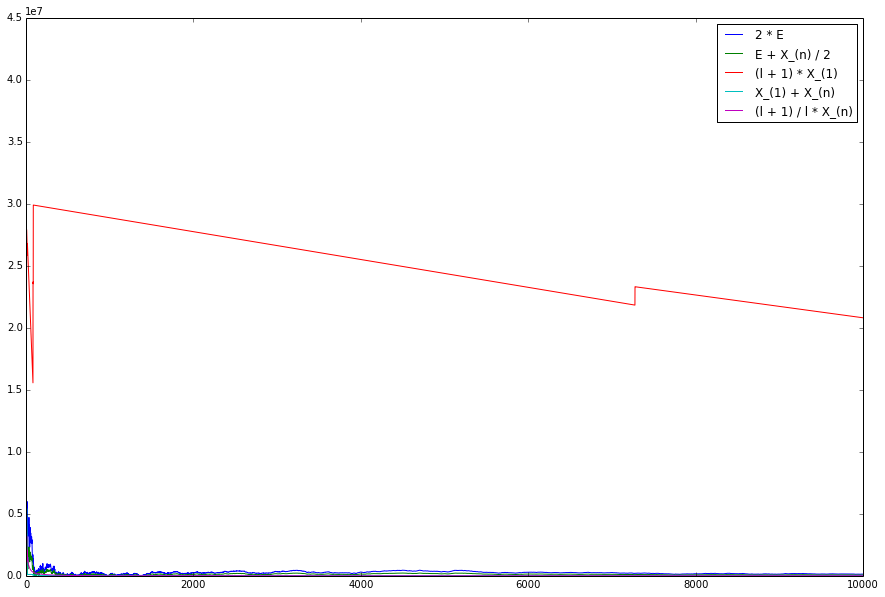

In [52]:
draw(10 ** 4, 30000000, 1.5)